In [27]:
import pprint
import requests
import pandas as pd
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer
import matplotlib.pyplot as plt



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sachi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sachi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [28]:
secret = '454c7b6933c5427cbf17ef85e4cf1ca7'


In [29]:
url='https://newsapi.org/v2/top-headlines?country=us&apiKey=454c7b6933c5427cbf17ef85e4cf1ca7'

In [30]:
parameters = {
  
    'pageSize': 20,  # maximum is 100
    'apiKey': secret # your own API key
}

In [31]:
response = requests.get(url, params=parameters)

# Convert the response to JSON format and pretty print it
response_json = response.json()
pprint.pprint(response_json)

{'articles': [{'author': 'CBS Los Angeles',
               'content': 'LAKE PIRU (CBSLA) — The search for 33-year-old '
                          'actress Naya Rivera was suspended late Wednesday '
                          'night after she went missing earlier in the day.\r\n'
                          'According to the Ventura County Sheriff’s '
                          'Department,… [+1605 chars]',
               'description': 'The search for 33-year-old actress Naya Rivera '
                              'was expected to resume Thursday morning.',
               'publishedAt': '2020-07-09T06:10:00Z',
               'source': {'id': None, 'name': 'Cbslocal.com'},
               'title': 'Actress Naya Rivera Presumed Drowned After Swimming '
                        'In Lake Piru With 4-Year-Old Son - CBS Los Angeles',
               'url': 'https://losangeles.cbslocal.com/2020/07/08/naya-rivera-missing-lake-piru-4-year-old-son-safe/',
               'urlToImage': 'https://losangele

In [32]:
for i in response_json['articles']:
    print(i['title'])

Actress Naya Rivera Presumed Drowned After Swimming In Lake Piru With 4-Year-Old Son - CBS Los Angeles
Mary Kay Letourneau's death is a 'big loss' for ex-Vili Fualaau, as he 'had a lot of love' for her - Daily Mail
Australia Halts Hong Kong Extradition Agreement and Extends Visas - The New York Times
United Airlines to furlough up to 36000 staff - BBC News
Vallejo police release bodycam video of man fatally shot in drug store parking lot - NBC News
Brazil's Bolsonaro Sued For Unmasking As He Announced Positive Test For COVID-19 - NPR
Microsoft Teams unleashes a flood of new features for video meetings - SlashGear
Black MLS players raise gloved fists in racial justice protest before first match - CNN
Is Kanye West's White House run realistic? - ABC News
Tucker warns idea Biden won't debate Trump sums up the far left: 'You criticize them ... they attack you' - Fox News
Coronavirus: ER doctor says trend just beginning for Orange County as hospitalizations spike - KABC-TV
Ruby Rose Reacts 

In [33]:
df=pd.DataFrame()
for i in response_json['articles']:
    df=df.append([i['title']])

df.reset_index(drop=True,inplace=True)
df=df.rename(columns={0:'Title'})
df.head(20)

,Title
0,Actress Naya Rivera Presumed Drowned After Swi...
1,Mary Kay Letourneau's death is a 'big loss' fo...
2,Australia Halts Hong Kong Extradition Agreemen...
3,United Airlines to furlough up to 36000 staff ...
4,Vallejo police release bodycam video of man fa...
5,Brazil's Bolsonaro Sued For Unmasking As He An...
6,Microsoft Teams unleashes a flood of new featu...
7,Black MLS players raise gloved fists in racial...
8,Is Kanye West's White House run realistic? - A...
9,Tucker warns idea Biden won't debate Trump sum...


In [34]:

stop_words = set(stopwords.words("english"))

new_words = ["using", "show", "result", "large", "also", "iv", "one", "two", "new", "previously", "shown"]
stop_words = stop_words.union(new_words)


In [35]:

corpus = []
for i in range(0, 20):

    text = re.sub('[^a-zA-Z]', ' ', df['Title'][i])
    

    text = text.lower()
    

    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
 
    text=re.sub("(\\d|\\W)+"," ",text)
    

    text = text.split()
    



    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    corpus.append(text)

In [36]:
for item in corpus:
        for subitem in item:
            text=" ".join(item)

    
print(text[1])


In [37]:
from sklearn.feature_extraction.text import CountVectorizer
import re
cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
X=cv.fit_transform(corpus)

In [38]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]
#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=75)
top_df = pd.DataFrame(top_words)

In [39]:

top_df=top_df.rename(columns={0:'Title',1:'Occurence'})
top_df.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Title      75 non-null     object
 1   Occurence  75 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.3+ KB


In [40]:
top_df.head()

,Title,Occurence
0,news,4
1,trump,4
2,time,3
3,cnn,3
4,business,3


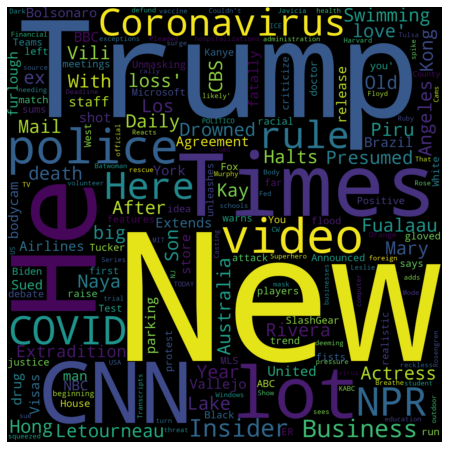

In [46]:
from wordcloud import WordCloud
text = df['Title']

# Create and generate a word cloud image:
wordcloud = WordCloud(width = 1600, height = 1600).generate(' '.join(text))

# Display the generated image:
plt.figure(figsize = (8, 8), facecolor = None) 

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()